# I. Introduction

Users' retention has always been one of the key targets that MoMo is striving to be better. A Loyalty program called "MoMo hoàn tiền" - one of the projects aiming to achieve such goal was launched from January 1st 2021 to March 2022.

### **Problems**:
What ideas do you have for MoMo in loyalty program development strategy?
Do you have any advice for the Marketing department in designing 
promotion campaigns to increase user retention's performance?

### **Solutions**:

1.   Using KMeans to cluster customers in groups by analysing RFM.
2.   Find characteristics and true needs of users to offer the right service.




### **Why RFM?**
**RFM Analysis** allows a comparison between potential contributors and clients. It gives organizations a sense of how much revenue comes from repeat customers (vs. new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

# II. Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta,date

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/data/Transactions.xlsx')
df1.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs


In [ ]:
merchant = pd.read_excel('/content/drive/MyDrive/data/Merchant.xlsx')
merchant.head()

,ServiceID,Service Group,Merchant,MerchantID
0,7eleven,cvs,7eleven,1
1,MOMOIOQC20191008,cvs,7eleven,1
2,opcaeon,supermarket,Aeon Mall,2
3,MOMOGPCQ20190613,supermarket,Aeon Mall,2
4,MOMOONXG20191120,supermarket,Aeon Mall,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52760 entries, 0 to 52759
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  52760 non-null  datetime64[ns]
 1   Order_id              52760 non-null  int64         
 2   NEWVERTICAL_Merchant  52760 non-null  object        
 3   MerchantID            52760 non-null  int64         
 4   User_id               52760 non-null  int64         
 5   GMV                   52760 non-null  int64         
 6   Service Group         52760 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.8+ MB


In [ ]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServiceID      218 non-null    object
 1   Service Group  218 non-null    object
 2   Merchant       218 non-null    object
 3   MerchantID     218 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.9+ KB


In [ ]:
df1.isnull().sum()

DATE                    0
Order_id                0
NEWVERTICAL_Merchant    0
MerchantID              0
User_id                 0
GMV                     0
Service Group           0
dtype: int64

In [ ]:
merchant.drop(columns=['ServiceID'], inplace=True)
merchant.drop_duplicates(inplace=True)
merchant

,Service Group,Merchant,MerchantID
0,cvs,7eleven,1
2,supermarket,Aeon Mall,2
9,supermarket,Big C,3
22,Coffee chains and Milk tea,Bobapop,4
24,cvs,BSMART,5
26,Coffee chains and Milk tea,Cà Phê Ông Bầu,6
28,Coffee chains and Milk tea,CHEESE COFFEE,7
29,cvs,Circle K,8
34,supermarket,Co.opmart,9
58,cvs,Co.opmart,9


In [ ]:
df1.describe()

,Order_id,MerchantID,User_id,GMV
count,52760.00,52760.00,52760.00,52760.00
mean,18494077343.03,25.23,41169684.89,143317.05
std,3069940335.41,11.93,13888776.79,374685.76
min,8725567343.00,1.00,108101.00,1000.00
25%,16751237963.75,18.00,36406565.50,15000.00
50%,19113255202.00,24.00,44075024.00,41000.00
75%,21154791299.00,37.00,50645303.00,125000.00
max,22559314724.00,44.00,61490552.00,20000000.00


In [ ]:
# Merge 2 dataframes
df = pd.merge(df1, merchant, on=['MerchantID','Service Group'], how='inner')
df.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,Tiki
1,2021-01-02,8747547067,Marketplace,37,61267321,100000,marketplace,Tiki
2,2021-01-02,8744545475,Marketplace,37,7367023,163000,marketplace,Tiki
3,2021-01-04,8773158882,Marketplace,37,7367023,188000,marketplace,Tiki
4,2021-01-05,8788745986,Marketplace,37,61488523,100000,marketplace,Tiki


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61743 entries, 0 to 61742
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  61743 non-null  datetime64[ns]
 1   Order_id              61743 non-null  int64         
 2   NEWVERTICAL_Merchant  61743 non-null  object        
 3   MerchantID            61743 non-null  int64         
 4   User_id               61743 non-null  int64         
 5   GMV                   61743 non-null  int64         
 6   Service Group         61743 non-null  object        
 7   Merchant              61743 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.2+ MB


In [ ]:
df.tail()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant
61738,2022-03-31,22542206333,Coffee chains and Milk tea,38,40219518,42000,Offline Beverage,TOCOTOCO
61739,2022-03-31,22543297946,Coffee chains and Milk tea,38,4350750,106000,Offline Beverage,TOCOTOCO
61740,2022-01-14,19782705655,Coffee chains and Milk tea,23,38899054,86000,Coffee chains and Milk tea,Koi Thé
61741,2022-02-09,20775675573,Coffee chains and Milk tea,23,53673930,140000,Coffee chains and Milk tea,Koi Thé
61742,2022-03-31,22552859554,Mass Merchant,34,55106223,124000,Offline Beverage,THE ALLEY


In [ ]:
df['DATE'].describe()

<ipython-input-19-559f375a970b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['DATE'].describe()


count                   61743
unique                    454
top       2021-11-11 00:00:00
freq                      683
first     2021-01-01 00:00:00
last      2022-03-31 00:00:00
Name: DATE, dtype: object

In [ ]:
df.duplicated().sum()

3585

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58158 entries, 0 to 61742
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  58158 non-null  datetime64[ns]
 1   Order_id              58158 non-null  int64         
 2   NEWVERTICAL_Merchant  58158 non-null  object        
 3   MerchantID            58158 non-null  int64         
 4   User_id               58158 non-null  int64         
 5   GMV                   58158 non-null  int64         
 6   Service Group         58158 non-null  object        
 7   Merchant              58158 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.0+ MB


In [ ]:
# Lowercase
df['NEWVERTICAL_Merchant'] = df['NEWVERTICAL_Merchant'].str.lower()
df['NEWVERTICAL_Merchant'] = df['NEWVERTICAL_Merchant'].str.title()
# Lowercase 
df['Merchant'] = df['Merchant'].str.lower()
df['Merchant'] = df['Merchant'].str.title()

In [ ]:
# Which type of Merchant that users often have transactions at
data = df.groupby('NEWVERTICAL_Merchant').size().rename('count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(data, x='NEWVERTICAL_Merchant', y='count', color = 'NEWVERTICAL_Merchant', text='count')
fig.update_layout(
    autosize=False,
    width=1000,
    height=400)
fig.show()

In [ ]:
df[df['NEWVERTICAL_Merchant'] == 'Airtime']

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant
25779,2021-01-01,8737762426,Airtime,30,59720332,10000,data,Mobifone
25780,2021-01-01,8728588470,Airtime,30,11368352,5000,data,Mobifone
25781,2021-01-01,8738189364,Airtime,30,60462106,42000,data,Mobifone
25782,2021-01-03,8758015013,Airtime,30,30376307,10000,data,Mobifone
25783,2021-01-04,8774127311,Airtime,30,50645303,2000,data,Mobifone
...,...,...,...,...,...,...,...,...
50847,2022-03-31,22540870142,Airtime,43,58123821,3000,data,Vinaphone
50848,2022-03-31,22550412110,Airtime,43,13646297,5200,data,Vinaphone
50849,2022-03-31,22532522304,Airtime,43,12149602,60000,data,Vinaphone
50850,2022-03-31,22552454611,Airtime,43,35991237,13000,data,Vinaphone


In [ ]:
# Plot pie chart to see which groups have the most transactions
fig = px.pie(df, values='Order_id', names='Service Group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

In [ ]:
# Which type of Merchant that users often have transactions at
data = df.groupby('Merchant').size().rename('count').reset_index().sort_values(by='count', ascending=False).head(15)
fig = px.bar(data, x='Merchant', y='count', color = 'Merchant', text='count')
fig.update_layout(
    autosize=False,
    width=1000,
    height=400)
fig.show()

Observations:
1.   Most transactions were made at Supermarket: Co.op Mart, Lazada, Big C, Aeon Mall, Lotte Mart
2.   The second is from Data: Viettel, Mobifone, Vinaphone



# III.1 Customer Segment

In [ ]:
# Create a new dataframe that contains unique users
df_user = pd.DataFrame(df['User_id'].unique())
df_user.columns = ['User_id']
df_user.value_counts()

User_id 
108101      1
48933297    1
48964139    1
48962174    1
48957057    1
           ..
40261450    1
40259677    1
40254916    1
40251531    1
61490552    1
Length: 6479, dtype: int64

In [ ]:
# Create new dataframe to find Recency by extracting the max date of transactions
df_max_purchase = df.groupby('User_id').DATE.max().reset_index()
df_max_purchase.columns = ['User_id','MaxPurchaseDate']
df_max_purchase.head()

,User_id,MaxPurchaseDate
0,108101,2021-07-27
1,136825,2022-01-24
2,138362,2021-05-14
3,162483,2022-03-31
4,171055,2021-09-09


In [ ]:
# Compute Recency by take the date maximum minus the date of last transaction
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days
df_max_purchase.head()

,User_id,MaxPurchaseDate,Recency
0,108101,2021-07-27,247
1,136825,2022-01-24,66
2,138362,2021-05-14,321
3,162483,2022-03-31,0
4,171055,2021-09-09,203


 Recency

In [ ]:
#merge this dataframe to our new user dataframe
df_user = pd.merge(df_user, df_max_purchase[['User_id','Recency']], on='User_id')
df_user.head()

,User_id,Recency
0,61386143,36
1,61267321,33
2,7367023,443
3,61488523,450
4,37269379,450


Frequency

In [ ]:
# Find Frequency by counting date of transactions
df_frequency = df.groupby('User_id').DATE.count().reset_index()
df_frequency.columns = ['User_id', 'Frequency']
# Merge to the main dataframe
df_user = pd.merge(df_user, df_frequency, on='User_id')
df_user.Frequency.describe()

count   6479.00
mean       8.98
std       19.35
min        1.00
25%        2.00
50%        4.00
75%        9.00
max      544.00
Name: Frequency, dtype: float64

In [ ]:
# Plotting Frequency
data = df_user.groupby('Frequency').size().rename('count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(data, x='Frequency', y='count', text='count')
fig.update_layout(
    autosize=False,
    width=1000,
    height=400)
fig.update_yaxes(range=[0, 120])
fig.show()

In [ ]:
# Plotting Recency
data2 = df_user.groupby('Recency').size().rename('count').reset_index().sort_values(by='count', ascending=False)
fig = px.bar(data2, x='Recency', y='count', text='count')
fig.update_layout(
    autosize=False,
    width=1000,
    height=400)
fig.show()

Monetary_value

In [ ]:
# Finding Monetary_value
df_revenue = df.groupby('User_id').GMV.sum().reset_index()
df_revenue.columns = ['User_id', 'Monetary_Value']
# Merge to the main dataframe
df_user = pd.merge(df_user, df_revenue, on='User_id')

In [ ]:
df_user.head()

,User_id,Recency,Frequency,Monetary_Value
0,61386143,36,7,349100
1,61267321,33,13,3342202
2,7367023,443,3,637000
3,61488523,450,5,290000
4,37269379,450,3,290000


Now that we have 3 values from RFM

## III.1.1 Plot distribution

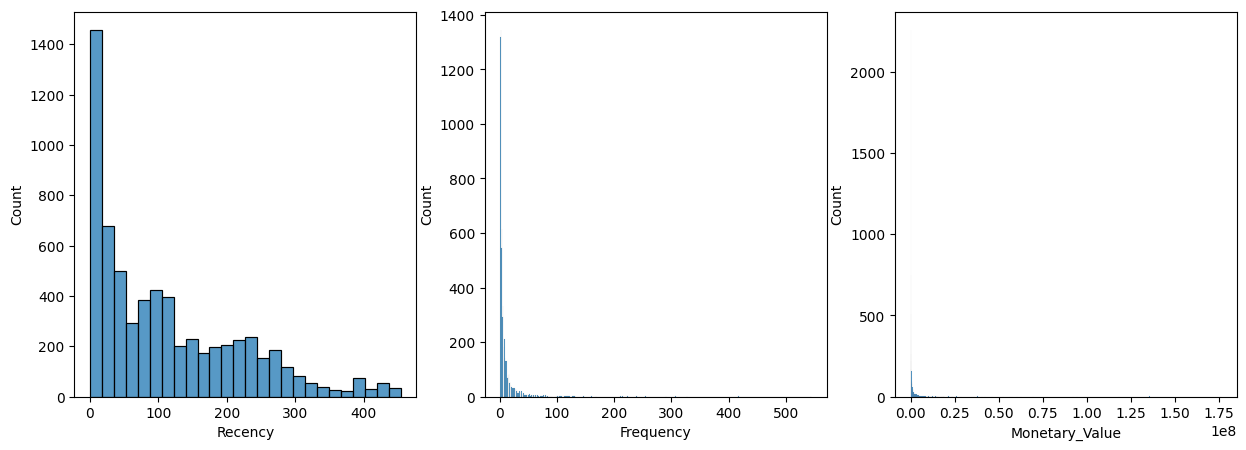

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary_Value']):
    sns.histplot(df_user[col], ax=ax[i])
    ax[i].set_xlabel(col)

plt.show()

From the subplots above, our data is skewed to the left, meaning it is not distributed well, so we need to transform and scale the data.


## III.1.2 Using Box-cox to transform data

In [ ]:
from scipy.stats import boxcox
# Select RFM columns from the original dataframe
rfm_data = df_user[['Recency', 'Frequency', 'Monetary_Value']]

# Apply the Box-Cox transformation to each column of the data
transformed_data = pd.DataFrame()
for col in rfm_data.columns:
    transformed_col, lambda_ = boxcox(rfm_data[col] + 1)
    transformed_data[col] = transformed_col

In [ ]:
# from scipy import stats
# def analyze_skewness(x):
#     fig, ax = plt.subplots(2, 2, figsize=(5,5))
#     sns.distplot(df_user[x], ax=ax[0,0])
#     sns.distplot(np.log(df_user[x]), ax=ax[0,1])
#     sns.distplot(np.sqrt(df_user[x]), ax=ax[1,0])
#     sns.distplot(stats.boxcox(df_user[x])[0], ax=ax[1,1])
#     plt.tight_layout()
#     plt.show()
    
#     print(df_user[x].skew().round(2))
#     print(np.log(df_user[x]).skew().round(2))
#     print(np.sqrt(df_user[x]).skew().round(2))
#     print(pd.Series(stats.boxcox(df_user[x])[0]).skew().round(2))

In [ ]:
# analyze_skewness('Frequency')

In [ ]:
from scipy.stats import skew

# Assuming the data is in a Pandas DataFrame called `df`
columns_to_analyze = ['Recency', 'Frequency', 'Monetary_Value']

# Calculate skewness for each column
for col in columns_to_analyze:
    skewness = skew(df_user[col])
    print(f"Skewness of {col}: {skewness:.2f}")

Skewness of Recency: 1.00
Skewness of Frequency: 9.96
Skewness of Monetary_Value: 18.34


In [ ]:
from scipy import stats
from scipy.stats import boxcox
df_user_2 = pd.DataFrame()
df_user_2['Recency'] = stats.boxcox(df_user['Recency'] + 1)[0]
df_user_2['Frequency'] = stats.boxcox(df_user['Frequency'])[0]
df_user_2['Monetary_Value'] = np.log(df_user['Monetary_Value'])
df_user_2.head()

,Recency,Frequency,Monetary_Value
0,6.51,1.51,12.76
1,6.26,1.85,15.02
2,17.38,0.95,13.36
3,17.48,1.31,12.58
4,17.48,0.95,12.58


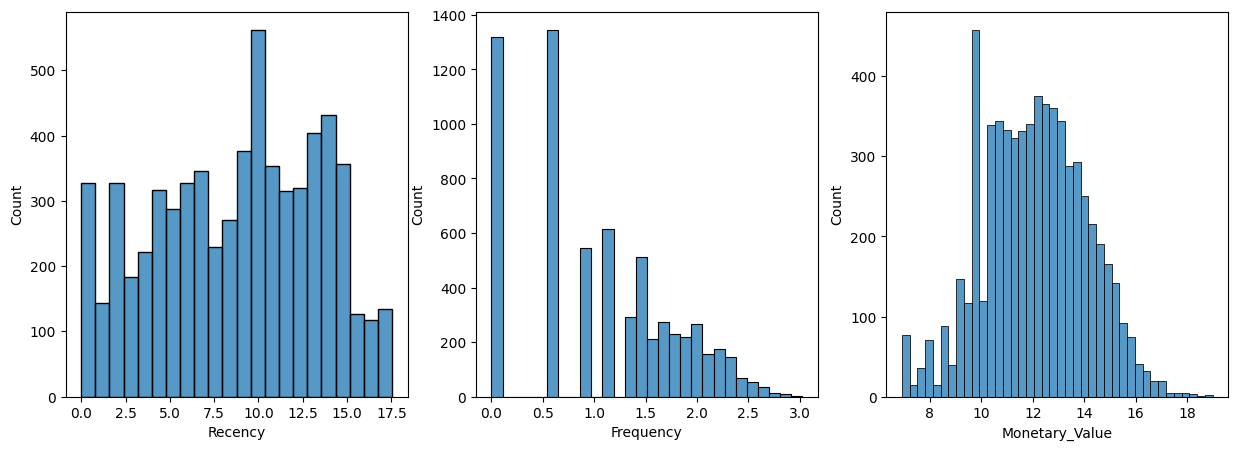

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary_Value']):
    sns.histplot(df_user_2[col], ax=ax[i])
    ax[i].set_xlabel(col)

plt.show()

## III.1.3 Scale data

**Do not excecuting this code**

In [ ]:
# Scale the transformed data using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

df_scaled = pd.DataFrame(scaled_data, columns=rfm_data.columns)
df_scaled.head()

,Recency,Frequency,Monetary_Value
0,-0.49,0.63,0.35
1,-0.54,1.11,1.49
2,1.89,-0.20,0.65
3,1.91,0.32,0.25
4,1.91,-0.20,0.25


As we can see above, Standard Scaler seems not to be as good as MinMax Scaler because it caused negative values in our data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming the transformed data is in a Pandas DataFrame called `df_transformed`
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_user_2), columns=df_user_2.columns)
df_scaled.head()

,Recency,Frequency,Monetary_Value
0,0.37,0.50,0.48
1,0.36,0.61,0.67
2,0.99,0.31,0.53
3,1.00,0.43,0.47
4,1.00,0.31,0.47


## III.1.4 Distribution after scaling data

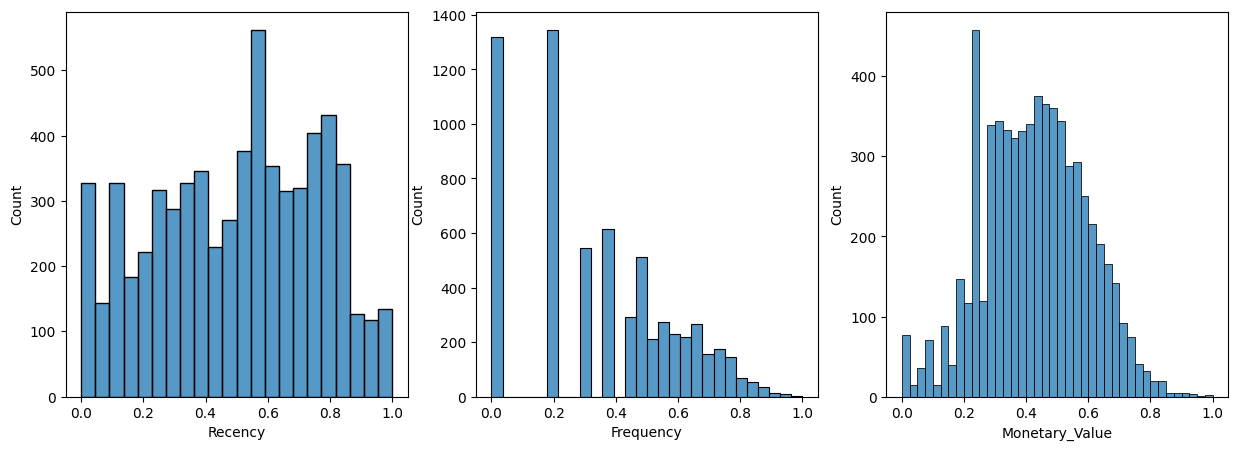

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary_Value']):
    sns.histplot(df_scaled[col], ax=ax[i])
    ax[i].set_xlabel(col)
plt.show()

# IV. Find K

## IV.2.1 Ploting Elbow vs Silhouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ls_error = []
ls_sihoulete = []

for k in range(2,11):
  kmeans = KMeans(n_clusters = k, init='k-means++', random_state=40)
  kmeans.fit(df_user)
  ls_error.append(kmeans.inertia_)
  sihouette_score = silhouette_score(df_scaled, kmeans.labels_)
  ls_sihoulete.append(sihouette_score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

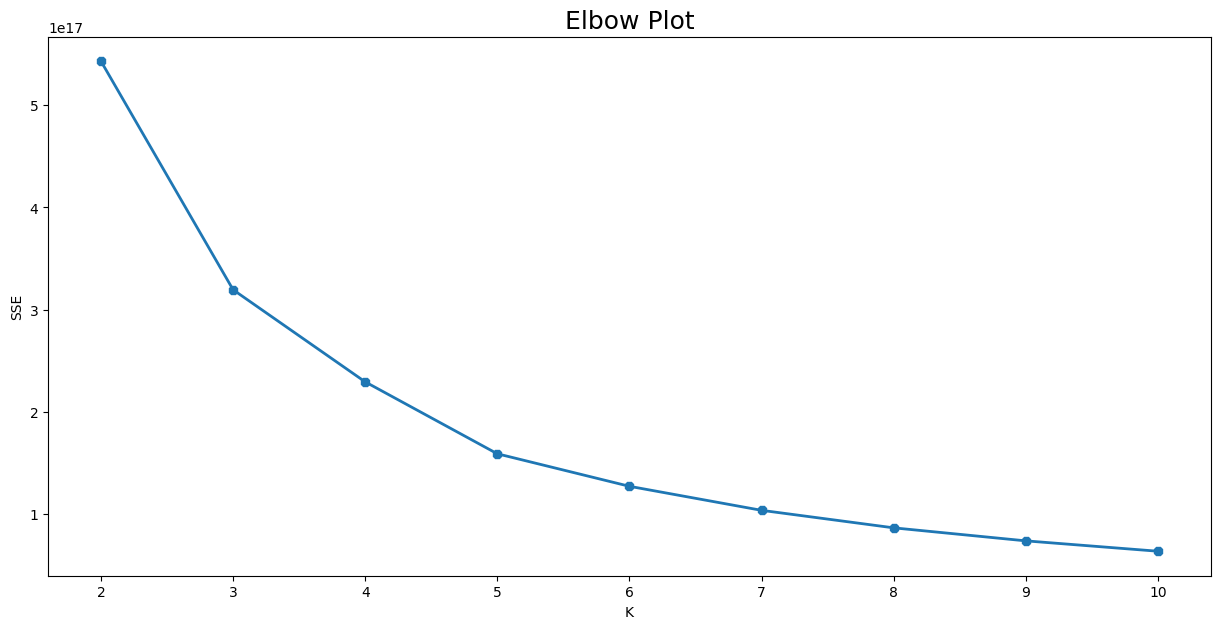

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(2, 11), ls_error, linewidth = 2, marker = '8')
plt.title('Elbow Plot', fontsize=18)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

Silhouette Plot

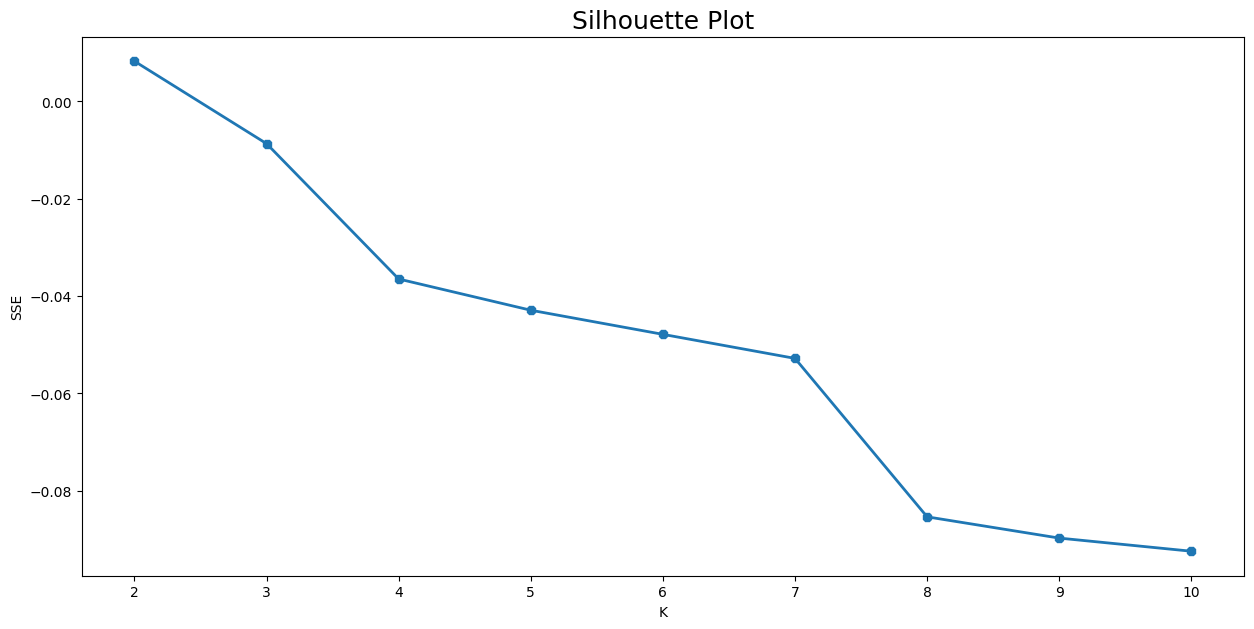

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(2, 11), ls_sihoulete, linewidth = 2, marker = '8')
plt.title('Silhouette Plot', fontsize=18)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## IV.2.2 Detect K using WCSS

The basic idea is to plot the Within-Cluster-Sum-of-Squares (WCSS) as a function of the number of clusters and identify the "knee" or "elbow" point in the plot, which corresponds to the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

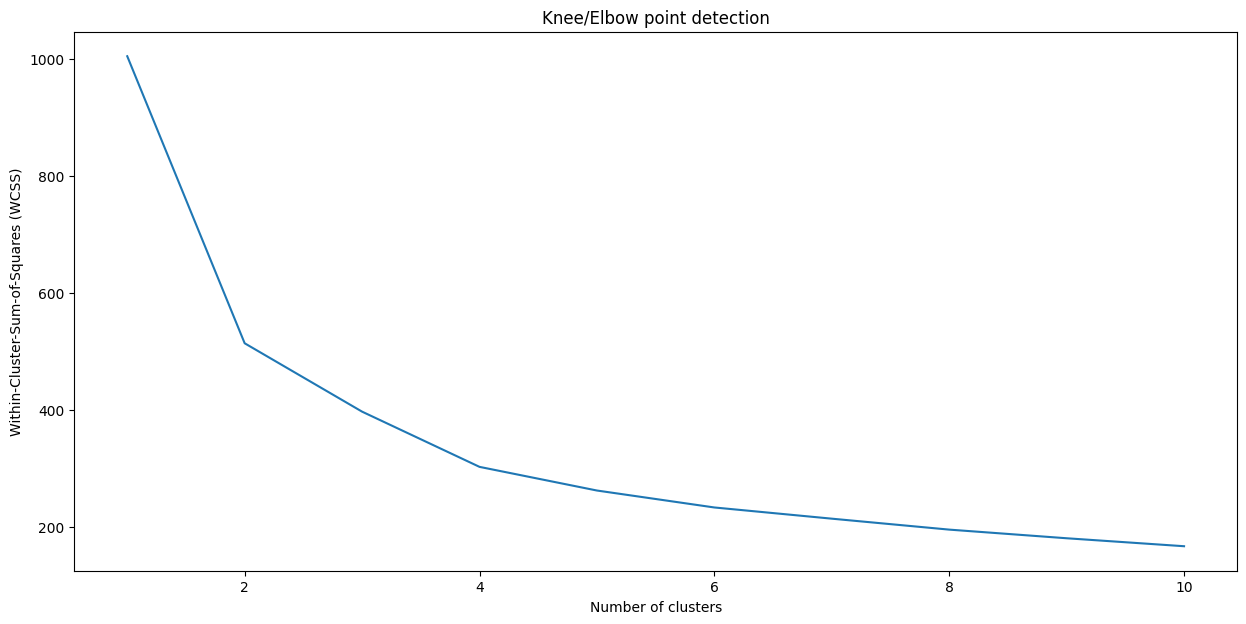

In [ ]:
# Select the number of clusters to try
k_values = range(1, 11)

# Fit KMeans clustering on the transformed data for each value of k
wcss_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS as a function of k
plt.figure(figsize=(15,7))
plt.plot(k_values, wcss_values)
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Knee/Elbow point detection')
plt.show()

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## IV.2.3 Using KneeLocator to identify K

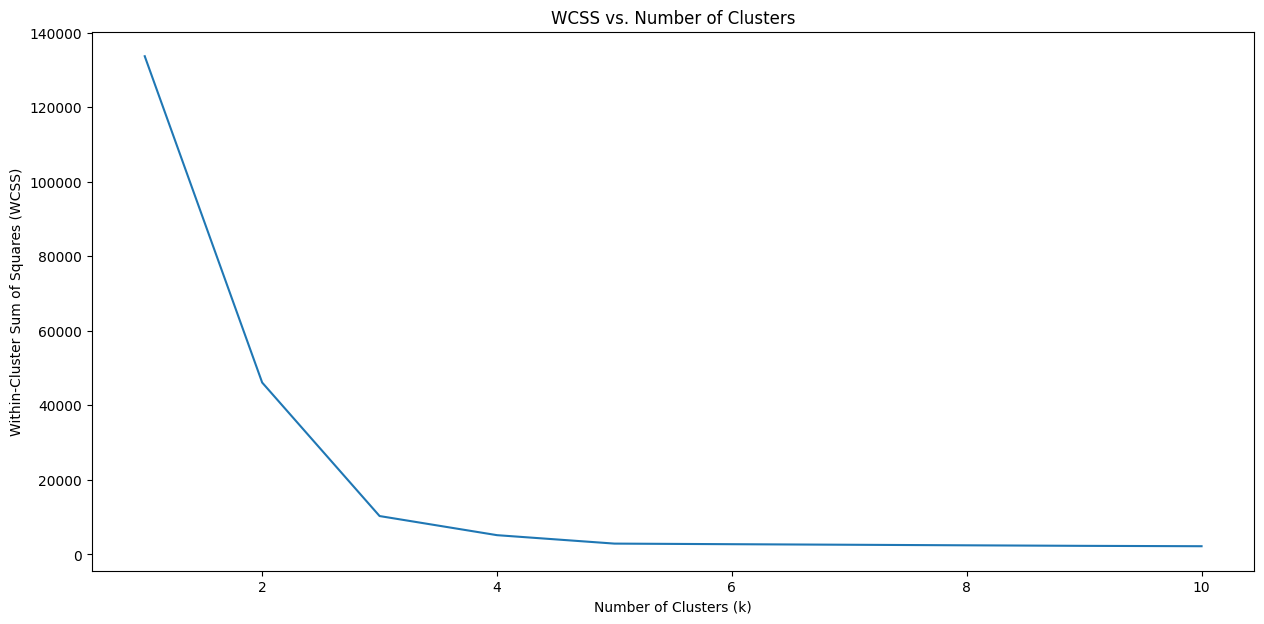

In [ ]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs

# generate example data
X, _ = make_blobs(n_samples=1000, centers=5, n_features=3, random_state=42)
# create empty list to store WCSS values
wcss = []
# fit KMeans for each k value from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# plot WCSS values as a function of k
plt.figure(figsize=(15,7))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS vs. Number of Clusters')
plt.show()

In [ ]:
# use kneed package to identify elbow/knee point in the plot
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
k = kl.elbow

print("Optimal number of clusters (k):", k)

Optimal number of clusters (k): 3


## IV.2.4 Detect K with KElbow Visualizer

The basic idea behind the KElbowVisualizer is to plot the within-cluster sum of squared errors (SSE) against different values of k and look for a "kink" or "elbow" in the plot where the rate of decrease in SSE slows down significantly. This point is often considered as the optimal value for k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

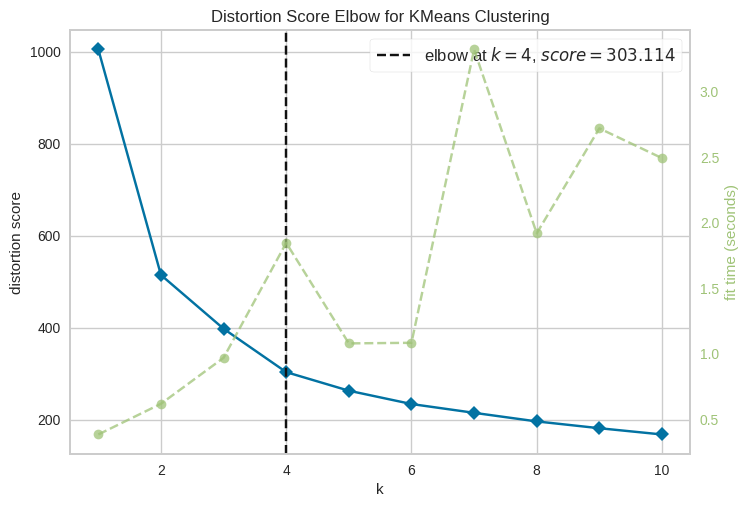

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,11)) # Instantiate a KElbowVisualizer object
visualizer.fit(df_scaled)
visualizer.show()

We have tried many ways to find the right K, after all, it is better that K = 4

# V.3 Modeling KMeans with K = 4

In [ ]:
# Modeling KMeans and fit to the df_scale
model = KMeans(n_clusters = 4, random_state=42)
model.fit(df_scaled)
# Get label for  the main dataframe **df_user**
df_user['Cluster'] = model.labels_
df_user.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,User_id,Recency,Frequency,Monetary_Value,Cluster
0,61386143,36,7,349100,3
1,61267321,33,13,3342202,3
2,7367023,443,3,637000,0
3,61488523,450,5,290000,0
4,37269379,450,3,290000,1


#### 3D plot

In [ ]:
model_2 = KMeans(n_clusters=4, random_state=42)
model_2.fit(df_user[['Recency', 'Frequency', 'Monetary_Value']])

# Extracting the cluster labels and adding to the original dataframe
df_user['Cluster'] = model_2.labels_

# Creating the 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_user, x='Recency', y='Frequency', z='Monetary_Value', color='Cluster')

fig.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_user[df_user['Cluster'] == 3]

,User_id,Recency,Frequency,Monetary_Value,Cluster,cluster
132,54341130,54,52,38005120,3,3
1138,39314846,1,91,46209664,3,3
1143,27110450,97,11,35876000,3,3
1593,55200938,0,240,37597758,3,3
1654,60529601,91,105,52494000,3,3
2573,59816775,93,17,34689900,3,3
3635,55096648,17,101,57688000,3,3
3817,1819189,92,55,40767000,3,3
4636,36742413,118,20,60600000,3,3
6102,47308429,274,32,62397000,3,3


In [ ]:
df_user['Cluster'].value_counts()

0    6268
2     192
3      14
1       5
Name: Cluster, dtype: int64

From this discovery, we can assume that:

1.   **Cluster 0** is **Standard User**
2.   **Cluster 1** is **Silver**
3.   **Cluster 2** is **Gold**
4.   **Cluster 3** is **Diamond**



In [ ]:
df = pd.merge(df, df_user, on='User_id')
df.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,Tiki,36,7,349100,0,0
1,2021-01-03,8759351785,Airtime,41,61386143,10000,data,Viettel,36,7,349100,0,0
2,2021-01-03,8759351785,Airtime,41,61386143,10000,data,Viettel,36,7,349100,0,0
3,2022-02-13,21020507161,Supermarket,3,61386143,119900,supermarket,Big C,36,7,349100,0,0
4,2022-02-13,21021012155,Supermarket,3,61386143,33200,supermarket,Big C,36,7,349100,0,0


In [ ]:
# convert all names to lowercase
df['Merchant'] = df['Merchant'].str.lower()

# capitalize first letter of each name
df['Merchant'] = df['Merchant'].str.title()

In [ ]:
df.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,Tiki,36,7,349100,0,0
1,2021-01-03,8759351785,Airtime,41,61386143,10000,data,Viettel,36,7,349100,0,0
2,2021-01-03,8759351785,Airtime,41,61386143,10000,data,Viettel,36,7,349100,0,0
3,2022-02-13,21020507161,Supermarket,3,61386143,119900,supermarket,Big C,36,7,349100,0,0
4,2022-02-13,21021012155,Supermarket,3,61386143,33200,supermarket,Big C,36,7,349100,0,0


In [ ]:
df_visualize = df.copy()

In [ ]:
df_visualize.duplicated().sum()

8983

In [ ]:
df_visualize.drop_duplicates(inplace=True)
df_visualize.duplicated().sum()

0

In [ ]:
df_visualize['Cluster'].value_counts()

0    38000
2     9146
1     1165
3      864
Name: Cluster, dtype: int64

## V.3.1 Applying Labels for Clusters

In [ ]:
cluster_0 = df_visualize[df_visualize['Cluster'] == 0]
cluster_0

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,Tiki,36,7,349100,0,0
1,2021-01-03,8759351785,Airtime,41,61386143,10000,data,Viettel,36,7,349100,0,0
3,2022-02-13,21020507161,Supermarket,3,61386143,119900,supermarket,Big C,36,7,349100,0,0
4,2022-02-13,21021012155,Supermarket,3,61386143,33200,supermarket,Big C,36,7,349100,0,0
5,2022-01-29,20341519896,Coffee Chains And Milk Tea,20,61386143,29000,Coffee chains and Milk tea,Highlands,36,7,349100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58153,2022-02-27,21467923013,Coffee Chains And Milk Tea,35,37375002,51000,Coffee chains and Milk tea,The Coffee House,32,1,51000,0,0
58154,2022-03-06,21673509622,Coffee Chains And Milk Tea,35,48918259,45000,Coffee chains and Milk tea,The Coffee House,25,1,45000,0,0
58155,2022-03-11,21808267714,Coffee Chains And Milk Tea,35,45825396,49000,Coffee chains and Milk tea,The Coffee House,20,1,49000,0,0
58156,2022-03-15,21984226387,Coffee Chains And Milk Tea,35,27772763,98600,Coffee chains and Milk tea,The Coffee House,16,1,98600,0,0


In [ ]:
cluster_1 = df_visualize[df_visualize['Cluster'] == 1]
cluster_1

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
1031,2021-06-24,13181279592,Marketplace,37,50185392,576576,marketplace,Tiki,2,307,118120167,1,1
1032,2021-06-24,13181015586,Marketplace,37,50185392,800386,marketplace,Tiki,2,307,118120167,1,1
1033,2021-07-12,13984450081,Marketplace,37,50185392,579366,marketplace,Tiki,2,307,118120167,1,1
1034,2021-08-14,15469622777,Marketplace,37,50185392,1382000,marketplace,Tiki,2,307,118120167,1,1
1035,2021-08-14,15469980526,Cashin Bank,37,50185392,1282000,marketplace,Tiki,2,307,118120167,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56842,2021-12-13,19078875264,Cashin Chain,28,35056283,3500000,cvs,Ministop,107,24,92320592,1,1
56843,2021-12-14,19099824661,Cashin Chain,28,35056283,5000000,cvs,Ministop,107,24,92320592,1,1
56844,2021-09-08,16342698896,Cvs,18,35056283,15000,cvs,Gs25,107,24,92320592,1,1
56845,2021-09-09,16379571856,Cvs,18,35056283,15000,cvs,Gs25,107,24,92320592,1,1


In [ ]:
cluster_2 = df_visualize[df_visualize['Cluster'] == 2]
cluster_2

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
31,2021-01-06,8807576268,Marketplace,37,28486514,216500,marketplace,Tiki,1,22,7142477,2,2
32,2021-08-07,15132265843,Marketplace,37,28486514,326000,marketplace,Tiki,1,22,7142477,2,2
33,2021-08-12,15362244723,Marketplace,37,28486514,283000,marketplace,Tiki,1,22,7142477,2,2
34,2021-09-04,16227255876,Marketplace,37,28486514,250000,marketplace,Tiki,1,22,7142477,2,2
35,2021-09-13,16543652410,Marketplace,37,28486514,375000,marketplace,Tiki,1,22,7142477,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58061,2021-09-25,16945532580,Cashin Bank,29,40097061,1225640,supermarket,Mm Mega Market,187,8,7677452,2,2
58062,2021-09-25,16945534851,Cashin Bank,29,40097061,243996,supermarket,Mm Mega Market,187,8,7677452,2,2
58063,2021-09-25,16945349012,Supermarket,29,40097061,1376801,supermarket,Mm Mega Market,187,8,7677452,2,2
58064,2021-09-25,16945037411,Supermarket,29,40097061,992289,supermarket,Mm Mega Market,187,8,7677452,2,2


In [ ]:
cluster_3 = df_visualize[df_visualize['Cluster'] == 3]
cluster_3.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Merchant,Recency,Frequency,Monetary_Value,Cluster,cluster
1401,2021-06-27,13329326935,Marketplace,37,54341130,1587000,marketplace,Tiki,54,52,38005120,3,3
1402,2021-07-03,13587408542,Marketplace,37,54341130,1215000,marketplace,Tiki,54,52,38005120,3,3
1403,2021-07-03,13587577117,Marketplace,37,54341130,499000,marketplace,Tiki,54,52,38005120,3,3
1404,2021-07-04,13626137631,Marketplace,37,54341130,1834000,marketplace,Tiki,54,52,38005120,3,3
1405,2021-07-05,13665813112,Marketplace,37,54341130,899000,marketplace,Tiki,54,52,38005120,3,3


## V.2 Clusters Analysis

### Compute the average GMV for customers in Clusters

Note: 
1.   GMV is calculated based on each **transaction**
2.   Monetary_value is calculated based on each **user**



In [ ]:
def format_vnd(value):
    return "{:,.2f} VND".format(value)

In [ ]:
# Compute the average GMV for each cluster
avg_gmv_3 = cluster_3['GMV'].mean()
avg_gmv_2 = cluster_2['GMV'].mean()
avg_gmv_1 = cluster_1['GMV'].mean()
avg_gmv_0 = cluster_0['GMV'].mean()

# Concatenate the four datasets into a single one
df_GMV = pd.concat([cluster_3['GMV'].reset_index().assign(Cluster='Cluster 3'),
                cluster_2['GMV'].reset_index().assign(Cluster='Cluster 2'),
                cluster_1['GMV'].reset_index().assign(Cluster='Cluster 1'),
                cluster_0['GMV'].reset_index().assign(Cluster='Cluster 0')])

fig = px.histogram(df, x='GMV', color='Cluster', nbins=30,
                   title="GMV Distribution for Customers in Clusters 0, 1, 2, and 3",
                   marginal='rug', opacity=0.7,
                   labels={'GMV': 'GMV', 'Cluster': 'Cluster'},
                   barmode='overlay')
fig.update_layout(bargap=0.1)
fig.show()

# Print the average GMV for each cluster
print("Average GMV for Cluster 3:", format_vnd(avg_gmv_3))
print("Average GMV for Cluster 2:", format_vnd(avg_gmv_2))
print("Average GMV for Cluster 1:", format_vnd(avg_gmv_1))
print("Average GMV for Cluster 0:", format_vnd(avg_gmv_0))

Average GMV for Cluster 3: 823,177.59 VND
Average GMV for Cluster 2: 246,354.22 VND
Average GMV for Cluster 1: 528,855.76 VND
Average GMV for Cluster 0: 91,478.53 VND


### Compute the most common service groups and merchants of users in Clusters

In [ ]:
# Compute the most common service groups and merchants for customers in Cluster 3
top_service_groups = cluster_3['Service Group'].value_counts().head(10)
top_merchants = cluster_3['Merchant'].value_counts().head(10)
print("Top Service Groups for Cluster 3:\n", top_service_groups)
print("Top Merchants for Cluster 3:\n", top_merchants)

Top Service Groups for Cluster 3:
 cvs                           536
marketplace                   207
Coffee chains and Milk tea     50
data                           43
supermarket                    28
Name: Service Group, dtype: int64
Top Merchants for Cluster 3:
 Ministop        511
Lazada          160
Tiki             47
Passio           47
Mobifone         39
Circle K         23
Finelife         23
Co.Opmart         4
Viettel           4
Coffee House      3
Name: Merchant, dtype: int64


In [ ]:
# Compute the most common service groups and merchants for customers in Cluster 2
top_service_groups = cluster_2['Service Group'].value_counts().head(10)
top_merchants = cluster_2['Merchant'].value_counts().head(10)
print("Top Service Groups for Cluster 2:\n", top_service_groups)
print("Top Merchants for Cluster 2:\n", top_merchants)

Top Service Groups for Cluster 2:
 marketplace                   3746
cvs                           2790
supermarket                   1542
data                           578
Coffee chains and Milk tea     484
Offline Beverage                 6
Name: Service Group, dtype: int64
Top Merchants for Cluster 2:
 Lazada       2943
Circle K      905
Tiki          803
Bsmart        778
Ministop      699
Co.Opmart     699
Mobifone      280
Big C         264
Viettel       258
Aeon Mall     229
Name: Merchant, dtype: int64


In [ ]:
# Compute the most common service groups and merchants for customers in Cluster 1
top_service_groups = cluster_1['Service Group'].value_counts().head(10)
top_merchants = cluster_1['Merchant'].value_counts().head(10)
print("Top Service Groups for Cluster 1:\n", top_service_groups)
print("Top Merchants for Cluster 1:\n", top_merchants)

Top Service Groups for Cluster 1:
 marketplace                   672
supermarket                   326
cvs                            91
Coffee chains and Milk tea     42
data                           34
Name: Service Group, dtype: int64
Top Merchants for Cluster 1:
 Lazada       532
Co.Opmart    324
Tiki         140
Ministop      77
Phuc Long     42
Mobifone      25
Circle K       8
Viettel        7
Gs25           6
Vinaphone      2
Name: Merchant, dtype: int64


In [ ]:
# Compute the most common service groups and merchants for customers in Cluster 0
top_service_groups = cluster_0['Service Group'].value_counts().head(10)
top_merchants = cluster_0['Merchant'].value_counts().head(10)
print("Top Service Groups for Cluster 0:\n", top_service_groups)
print("Top Merchants for Cluster 0:\n", top_merchants)

Top Service Groups for Cluster 0:
 data                          15435
marketplace                   11253
cvs                            6918
supermarket                    2831
Coffee chains and Milk tea     1536
Offline Beverage                 27
Name: Service Group, dtype: int64
Top Merchants for Cluster 0:
 Lazada        9436
Viettel       8714
Mobifone      4814
Circle K      3546
Vinaphone     1907
Tiki          1817
Co.Opmart     1611
Ministop      1171
Gs25           806
Familymart     690
Name: Merchant, dtype: int64


### Compute the average recency and frequency of purchases from users in Clusters

In [ ]:
# Compute the average recency and frequency of purchases for customers in Cluster 0
avg_recency = cluster_0['Recency'].mean()
avg_frequency = cluster_0['Frequency'].mean()
print("Average Recency for Cluster 0:", avg_recency)
print("Average Frequency for Cluster 0:", avg_frequency)

# Compute the average recency and frequency of purchases for customers in Cluster 1
avg_recency = cluster_1['Recency'].mean()
avg_frequency = cluster_1['Frequency'].mean()
print("Average Recency for Cluster 1:", avg_recency)
print("Average Frequency for Cluster 1:", avg_frequency)

# Compute the average recency and frequency of purchases for customers in Cluster 2
avg_recency = cluster_2['Recency'].mean()
avg_frequency = cluster_2['Frequency'].mean()
print("Average Recency for Cluster 2:", avg_recency)
print("Average Frequency for Cluster 2:", avg_frequency)

# Compute the average recency and frequency of purchases for customers in Cluster 3
avg_recency = cluster_3['Recency'].mean()
avg_frequency = cluster_3['Frequency'].mean()
print("Average Recency for Cluster 3:", avg_recency)
print("Average Frequency for Cluster 3:", avg_frequency)

Average Recency for Cluster 0: 59.73271052631579
Average Frequency for Cluster 0: 26.84842105263158
Average Recency for Cluster 1: 6.306437768240343
Average Frequency for Cluster 1: 286.7081545064378
Average Recency for Cluster 2: 18.705554340695386
Average Frequency for Cluster 2: 124.03553465996063
Average Recency for Cluster 3: 51.78125
Average Frequency for Cluster 3: 118.28819444444444


In [ ]:
# Combine the clusters into a single dataframe
cluster_df = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3])

# Create a scatter plot of recency vs. frequency for all clusters
fig = px.scatter(cluster_df, x="Recency", y="Frequency", color= 'Cluster', title="Recency vs. Frequency for all Clusters")
fig.show()

### Compute the average monetary value of purchases from users in Cluster

In [ ]:
# Compute the average monetary value for each cluster
avg_monetary_value_3 = cluster_3['Monetary_Value'].mean()
avg_monetary_value_2 = cluster_2['Monetary_Value'].mean()
avg_monetary_value_1 = cluster_1['Monetary_Value'].mean()
avg_monetary_value_0 = cluster_0['Monetary_Value'].mean()

# Concatenate the three datasets into a single one
df = pd.concat([cluster_3.groupby('DATE')['GMV'].mean().reset_index().assign(Cluster='Cluster 3'),
                cluster_2.groupby('DATE')['GMV'].mean().reset_index().assign(Cluster='Cluster 2'),
                cluster_1.groupby('DATE')['GMV'].mean().reset_index().assign(Cluster='Cluster 1'),
                cluster_0.groupby('DATE')['GMV'].mean().reset_index().assign(Cluster='Cluster 0')])

# Plot the data using Plotly Express
fig = px.line(df, x='DATE', y='GMV', color='Cluster',
              title='GMV over Time for Customers in Clusters 1, 2, 3, and 4')
fig.show()

# Print the average monetary value for each cluster
print("Average Monetary Value for Cluster 3:", format_vnd(avg_monetary_value_3))
print("Average Monetary Value for Cluster 2:", format_vnd(avg_monetary_value_2))
print("Average Monetary Value for Cluster 1:", format_vnd(avg_monetary_value_1))
print("Average Monetary Value for Cluster 0:", format_vnd(avg_monetary_value_0))

Average Monetary Value for Cluster 3: 48,302,317.34 VND
Average Monetary Value for Cluster 2: 13,790,191.00 VND
Average Monetary Value for Cluster 1: 128,812,393.86 VND
Average Monetary Value for Cluster 0: 1,507,251.40 VND


In [ ]:
# create the countplot
fig = px.histogram(df_visualize, x='Service Group', color='Cluster')

# rotate the x-labels by 45 degrees
fig.update_layout(xaxis={'tickangle': 45})

# display the plot
fig.show()

In [ ]:
cluster_means = df_visualize.groupby('Cluster')['Recency', 'Frequency', 'Monetary_Value'].mean()
cluster_std = df_visualize.groupby('Cluster')['Recency', 'Frequency', 'Monetary_Value'].std()
print(cluster_means)
print(cluster_std)

         Recency  Frequency  Monetary_Value
Cluster                                    
0          59.73      26.85      1507251.40
1           6.31     286.71    128812393.86
2          18.71     124.04     13790191.00
3          51.78     118.29     48302317.34
         Recency  Frequency  Monetary_Value
Cluster                                    
0          81.30      32.85      1554831.71
1          15.24      52.61     30929251.13
2          34.80     138.18      6481930.12
3          61.71      79.86     10783291.92


<ipython-input-105-125c13990772>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-105-125c13990772>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# VI. Hypothesis Testing using t-test

Is there any significant difference in the mean GMV values between the two clusters 1 and 0?

Compare the mean values of the GMV feature between two clusters. 
If the p-value is less than my **chosen significance level** : **0.05**, then I can reject the null hypothesis that **there is no significant difference in the mean GMV values between the two clusters**.


In [ ]:
from scipy.stats import ttest_ind

# extract GMV data for cluster 1 and cluster 2
cluster1_gmv = df_visualize[df_visualize['Cluster']==1]['GMV']
cluster2_gmv = df_visualize[df_visualize['Cluster']==0]['GMV']

# perform t-test
t_stat, p_value = ttest_ind(cluster1_gmv, cluster2_gmv, equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 23.080109674728675
p-value: 1.9049361463822197e-97


In [ ]:
1.9049361463822197e-97 > 0.05

False

The p-value is much smaller than the significance level, which means that we can reject the null hypothesis in favor of the alternative hypothesis.

# VII. In conclusion

**Cluster 0**: **BRONZE or STANDARD** (Should be exloited the most)
- Cluster has the least **GMV** which is ~ **91.478 VND**
- **Average Monetary Value** for Cluster 0: **1.507.251** VND
- These users belong in this cluster usually have transactions at **data, marketplace, cvs, supermarket, Coffee chains and Milk tea**.
- Their favorite merchants are **Lazada, Viettel, Mobifone, Circle K, Vinaphone**.
- Their **Average Frequency** is 26.8 and **Average Recency** is 59.7.
- Joined and stayed stable from the begining to the end of this program.
==> These are loyal users also, they noticed this program since it was first launched.

**Recommendations**:
- Offer discounts from Data Mobile channels for 4G, Wi-fi.
- Offer coupons from Coffee and Milk-tea chains

-------------------------------------------------------------

**Cluster 1**: **DIAMOND** 
- This Cluster has the **highest average GMV** which is ~ **528.855 VND**
- **Average Monetary Value** for Cluster 0: **128,812,393.86 VND**
- These users belong in this cluster usually have transactions at **marketplace, supermarket, cvs, Coffee chains and Milk tea, data**
- Their favorite merchants are **Lazada, Co.Opmart, Tiki, Ministop, Phuc Long**
- Their **Average Frequency** is 286.7 and **Average Recency** is 6.3
- Started to join at 14 May, 2021, which is very late
==> They are stable, loyal users, they likely to purchase for 4G or Wi-fi
 
**Recommendations**:
- Promote vouchers to pay bills monthly: 
+ Discount 10% for every bill has total more than 5 Million VND in Supermarket Chains. (Establish partnership with Lazada, Co.Opmart)
+ Give E-code from Tiki to exchange for payment greater than 2 Million VND 

-------------------------------------------------------------

**Cluster 2**: **SILVER**
- This Cluster has the** 3rd highest average GMV** which is ~ **246,354.22 VND**
- **Average Monetary Value** for Cluster 1: **13,790,191.00 VND**
- These users belong in this cluster usually have transactions at: **marketplace, cvs, supermarket, data, Coffee chains and Milk tea**
- Their favorite merchants are: **Lazada, Circle K, Tiki, Bsmart, Ministop**
- Their **Average Frequency** is 286.7 and **Average Recency** is 6.3
- Started to join strongly on 27 Jan, 2021 and decreased on 20 Apr, 2021.

**Recommendations**:
+ Establish partnership with Co.op Mart, Lazada, Circle K, Viettel, Mobifone to have exclusive promotion program “Incentives for customers"
+ Discount 10.000 VND from 300.000-bill for Electricity.

-------------------------------------------------------------

**Cluster 3**: **GOLD**
- This Cluster has the **second highest average GMV** which is ~ **823.177 VND**
- **Average Monetary Value** for Cluster 3: **48,302,317.34 VND**
- These users belong in this cluster usually have transactions at: **cvs, marketplace, Coffee chains and Milk tea, data, supermarket**
- Their favorite merchants are: **Ministop, Lazada, Tiki, Passio, Mobifone**
- Their **Average Frequency** is **118.2** and **Average Recency** is **51.7**
- GMV over time significantly increased in 6 Mar,2021 then dropped, often at early or lately of the months

==> These users are loyal to this program

**Recommendations**:
+ Establish partnership with Co.op Mart, Lazada, Circle K, Viettel, Mobifone to have exclusive promotion program “Incentives for customers"
+ Discount 10.000 VND from 300.000-bill for Electricity.

-------------------------------------------------------------

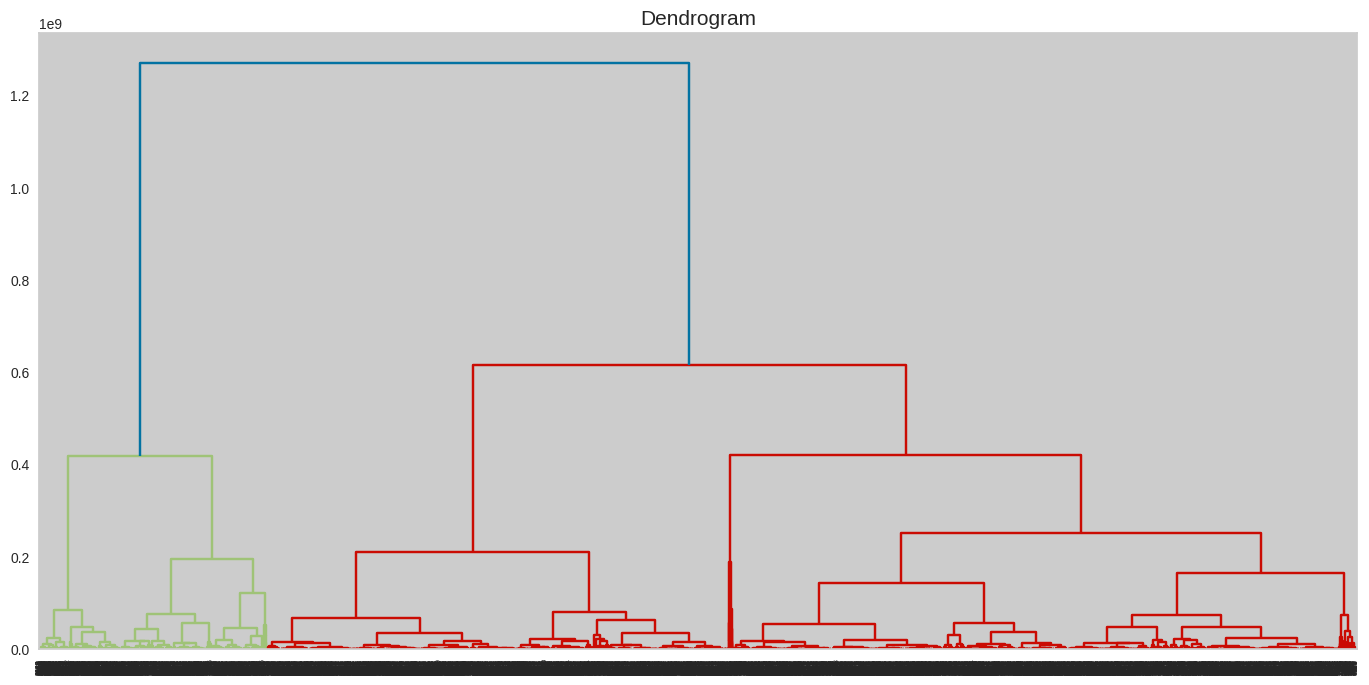

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(df_user, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

--------------------------The End--------------------------